In [132]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

plt.rcParams['font.family'] = 'Malgun Gothic'

In [133]:
data = pd.read_csv('Mall_Customers.csv', encoding='utf-8', low_memory=False)

df = pd.DataFrame(data)

In [134]:
# 10살 단위 그룹화 함수
def age_group(age):
    return f"{(age // 10) * 10}s"

# 데이터프레임에 컬럼 추가
df['AgeGroup'] = df['Age'].apply(age_group)

In [135]:
df.groupby('AgeGroup')[['Annual Income (k$)', 'Spending Score (1-100)']].describe()

Annual Income (k$)                                                  \
                      count       mean        std   min    25%   50%    75%   
AgeGroup                                                                      
10s                    12.0  55.083333  18.243097  15.0  47.50  61.0  65.00   
20s                    43.0  51.837209  24.709676  15.0  29.50  54.0  72.50   
30s                    61.0  70.180328  30.999736  17.0  43.00  76.0  87.00   
40s                    39.0  63.948718  24.077669  25.0  48.50  61.0  77.50   
50s                    25.0  58.680000  22.490220  20.0  43.00  57.0  75.00   
60s                    18.0  49.166667  14.649834  19.0  44.75  50.0  62.75   
70s                     2.0  47.500000   2.121320  46.0  46.75  47.5  48.25   

                Spending Score (1-100)                                     \
            max                  count       mean        std   min    25%   
AgeGroup                                                                    
10s        81.0                   12.0  46.500000  22.697617   5.0  40.50   
20s       101.0                   43.0  61.953488  23.200937   5.0  49.50   
30s       137.0                   61.0  61.098361  28.299414   1.0  40.00   
40s       126.0                   39.0  34.948718  18.525869   5.0  17.00   
50s       101.0                   25.0  34.720000  18.935241   4.0  15.00   
60s        65.0                   18.0  41.611111  17.036773   3.0  41.50   
70s        49.0                    2.0  55.500000   0.707107  55.0  55.25   

                             
           50%    75%   max  
AgeGroup                     
10s       49.0  56.00  92.0  
20s       66.0  80.00  97.0  
30s       72.0  85.00  99.0  
40s       36.0  47.50  95.0  
50s       43.0  50.00  60.0  
60s       48.0  51.75  59.0  
70s       55.5  55.75  56.0

In [136]:
# 성별 분포
gender_counts = df.groupby('Gender').size()
print(gender_counts)

Gender
Female    112
Male       88
dtype: int64


In [137]:
df.groupby('Gender')[['Annual Income (k$)', 'Spending Score (1-100)']].describe()

Annual Income (k$)                                                  \
                    count       mean        std   min    25%   50%    75%   
Gender                                                                      
Female              112.0  59.250000  26.011952  16.0  39.75  60.0  77.25   
Male                 88.0  62.227273  26.638373  15.0  45.50  62.5  78.00   

              Spending Score (1-100)                                        \
          max                  count       mean       std  min   25%   50%   
Gender                                                                       
Female  126.0                  112.0  51.526786  24.11495  5.0  35.0  50.0   
Male    137.0                   88.0  48.511364  27.89677  1.0  24.5  50.0   

                    
         75%   max  
Gender              
Female  73.0  99.0  
Male    70.0  97.0

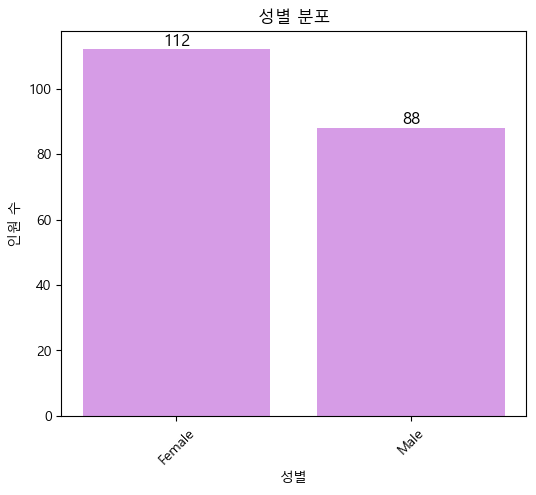

In [138]:
#시각화
plt.figure(figsize=(6,5))
bars = plt.bar(gender_counts.index, gender_counts.values, color="#d69ce6")
plt.xticks(rotation=45)

plt.title("성별 분포")
plt.xlabel("성별")
plt.ylabel("인원 수")

# 막대 위에 숫자 표시
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height, f'{int(height)}',
             ha='center', va='bottom', fontsize=12)

plt.show()

In [139]:
# 나이 분포
age_counts = df.groupby('AgeGroup').size()
print(age_counts)

AgeGroup
10s    12
20s    43
30s    61
40s    39
50s    25
60s    18
70s     2
dtype: int64


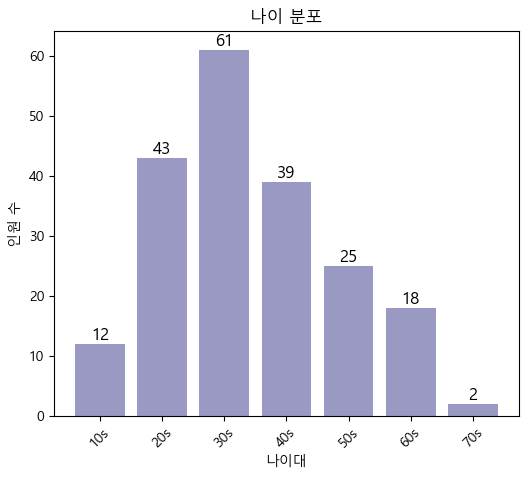

In [140]:
#시각화
plt.figure(figsize=(6,5))
bars = plt.bar(age_counts.index, age_counts.values, color="#9a99c4")
plt.xticks(rotation=45)

plt.title("나이 분포")
plt.xlabel("나이대")
plt.ylabel("인원 수")

# 막대 위에 숫자 표시
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height, f'{int(height)}',
             ha='center', va='bottom', fontsize=12)

plt.show()

30대의 인원이 많기 때문에 
<br> 30대에게 잘 팔리는 상품을 다른 상품보다 많이 준비해 둘 수 있음

In [141]:
# 그룹화 및 집계: 성별에 따른 평균 소비 점수
grouped1 = df.groupby('Gender')['Spending Score (1-100)'].mean()
print(grouped1)

Gender
Female    51.526786
Male      48.511364
Name: Spending Score (1-100), dtype: float64


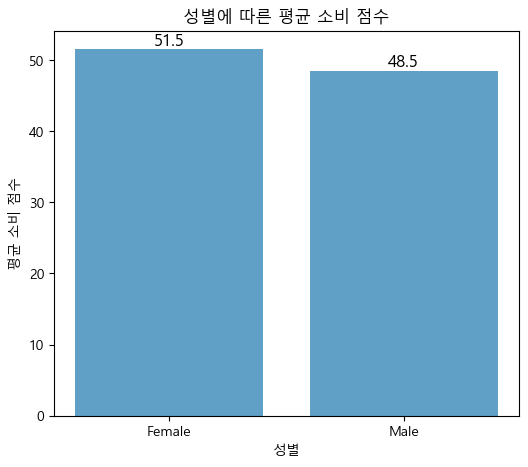

In [142]:
# 시각화
plt.figure(figsize=(6,5))
bars = plt.bar(grouped1.index, grouped1.values, color="#60a0c7")

# 막대 위에 평균값 표시
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f"{yval:.1f}", ha='center', va='bottom', fontsize=12)

plt.xlabel("성별")
plt.ylabel("평균 소비 점수")
plt.title("성별에 따른 평균 소비 점수")
plt.show()


In [143]:
# 그룹화 및 집계: 나이대별 평균 수입 계산
grouped2 = df.groupby('AgeGroup')['Annual Income (k$)'].mean()
print(grouped2)

AgeGroup
10s    55.083333
20s    51.837209
30s    70.180328
40s    63.948718
50s    58.680000
60s    49.166667
70s    47.500000
Name: Annual Income (k$), dtype: float64


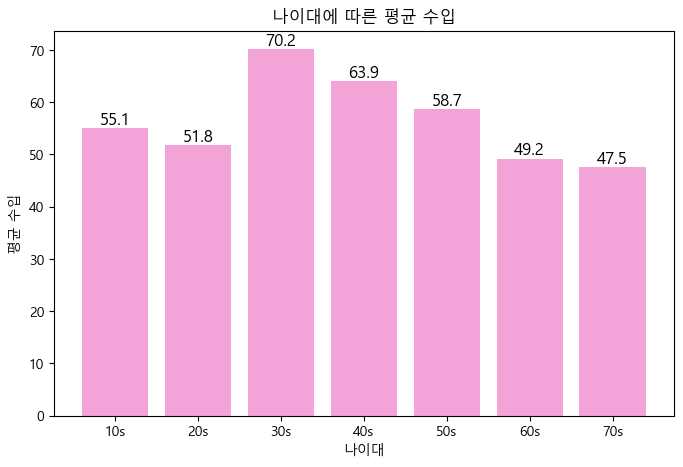

In [144]:
# 시각화
plt.figure(figsize=(8,5))
bars = plt.bar(grouped2.index, grouped2.values, color="#f2a4d9")

# 막대 위에 평균값 표시
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f"{yval:.1f}", ha='center', va='bottom', fontsize=12)

plt.xlabel("나이대")
plt.ylabel("평균 수입")
plt.title("나이대에 따른 평균 수입")
plt.show()


In [145]:
grouped3 = df.groupby('AgeGroup')['Spending Score (1-100)'].mean()
print(grouped3)

AgeGroup
10s    46.500000
20s    61.953488
30s    61.098361
40s    34.948718
50s    34.720000
60s    41.611111
70s    55.500000
Name: Spending Score (1-100), dtype: float64


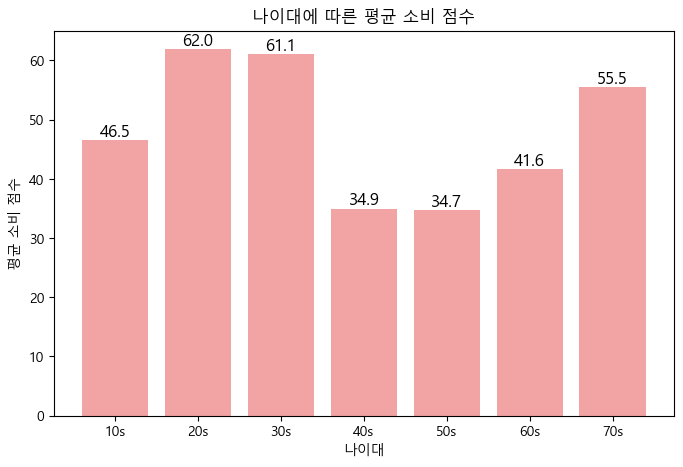

In [146]:
# 시각화
plt.figure(figsize=(8,5))
bars = plt.bar(grouped3.index, grouped3.values, color="#f2a4a4")

# 막대 위에 평균값 표시
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f"{yval:.1f}", ha='center', va='bottom', fontsize=12)

plt.xlabel("나이대")
plt.ylabel("평균 소비 점수")
plt.title("나이대에 따른 평균 소비 점수")
plt.show()


In [147]:
# 피벗테이블 생성: 나이대, 성별에 따른 수입 평균
pivot_income = pd.pivot_table(
    df,
    values='Annual Income (k$)',
    index='AgeGroup',
    columns='Gender',
    aggfunc='mean'
)
print(pivot_income)

Gender       Female       Male
AgeGroup                      
10s       64.333333  52.000000
20s       49.076923  56.058824
30s       66.243243  76.250000
40s       61.750000  67.466667
50s       58.142857  59.363636
60s       52.500000  46.500000
70s             NaN  47.500000


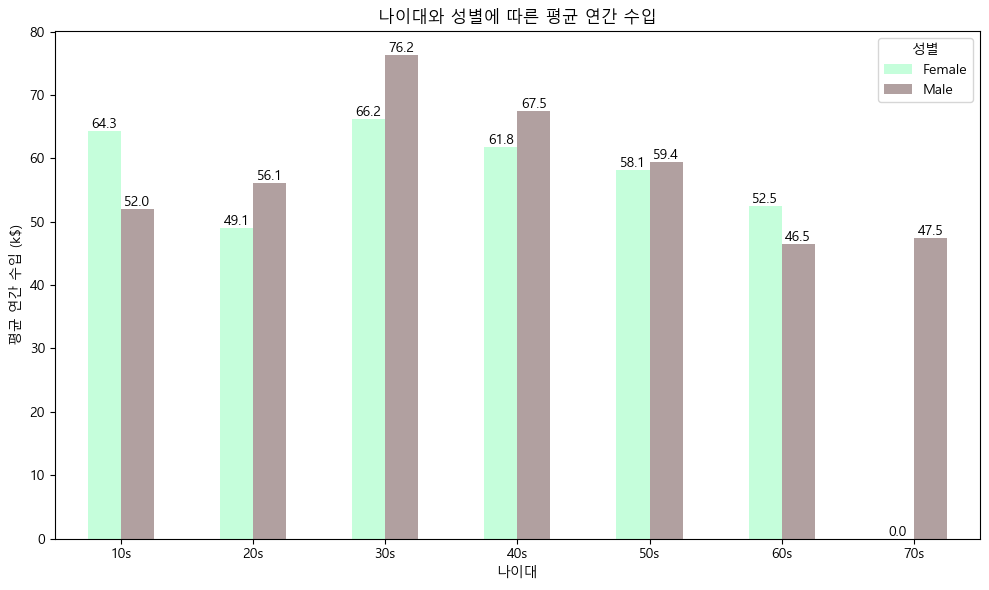

In [148]:
ax = pivot_income.plot(
    kind='bar',
    figsize=(10,6),
    color=["#c5fedb", "#B1A0A0"],
    rot=0,
    title="나이대와 성별에 따른 평균 연간 수입"
)

for bars in ax.containers:
    for bar in bars:
        yval = bar.get_height()
        ax.text(
            bar.get_x() + bar.get_width()/2, yval,
            f'{yval:.1f}',
            ha='center', va='bottom', fontsize=10
        )

plt.xlabel("나이대")
plt.ylabel("평균 연간 수입 (k$)")
plt.legend(title='성별')
plt.tight_layout()
plt.show()


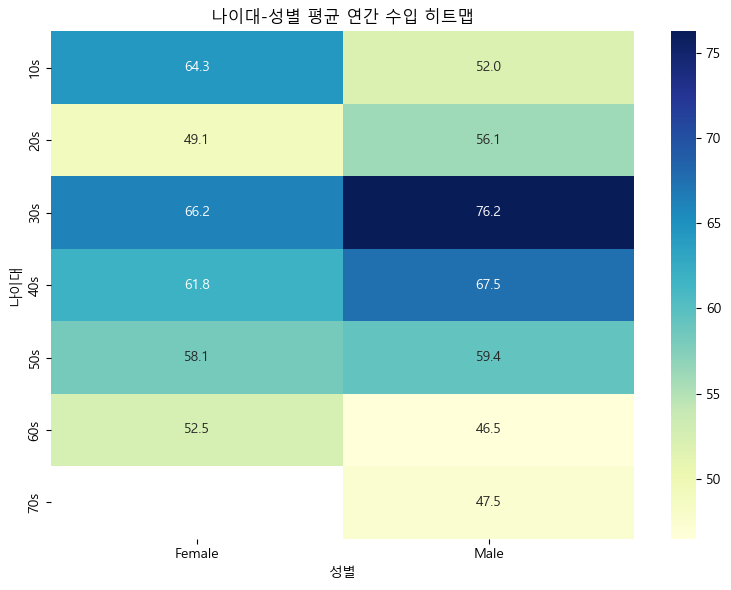

In [149]:
# 히트맵 시각화
plt.figure(figsize=(8, 6))
sns.heatmap(pivot_income, annot=True, fmt=".1f", cmap="YlGnBu")
plt.title("나이대-성별 평균 연간 수입 히트맵")
plt.xlabel("성별")
plt.ylabel("나이대")
plt.tight_layout()
plt.show()

30대 남성의 연간 수익이 가장 높고 60대 남성의 연간 수익이 가장 적다 <br>

In [150]:
# 피벗테이블 생성: 나이대, 성별에 따른 평균 소비 점수
pivot_score = pd.pivot_table(
    df,
    values='Spending Score (1-100)',
    index='AgeGroup',
    columns='Gender',
    aggfunc='mean'
)
print(pivot_score)

Gender       Female       Male
AgeGroup                      
10s       50.666667  45.111111
20s       61.500000  62.647059
30s       62.378378  59.125000
40s       33.541667  37.200000
50s       37.071429  31.727273
60s       48.500000  36.100000
70s             NaN  55.500000


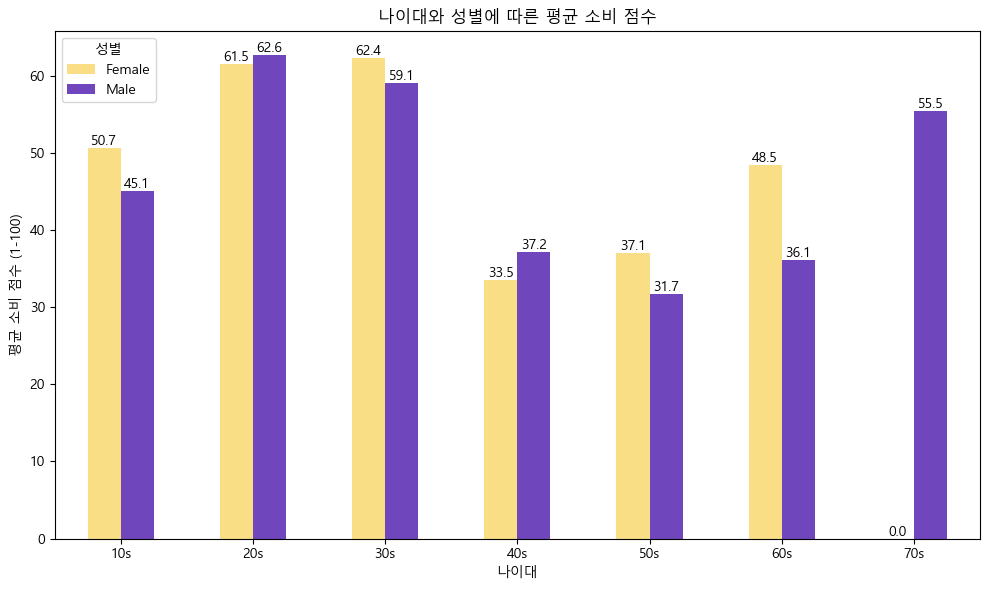

In [151]:
ax = pivot_score.plot(
    kind='bar',
    figsize=(10,6),
    color=["#f9de86", "#6F46BC"],
    rot=0,
    title="나이대와 성별에 따른 평균 소비 점수"
)

for bars in ax.containers:
    for bar in bars:
        yval = bar.get_height()
        ax.text(
            bar.get_x() + bar.get_width()/2, yval,
            f'{yval:.1f}',
            ha='center', va='bottom', fontsize=10
        )

plt.xlabel("나이대")
plt.ylabel("평균 소비 점수 (1-100)")
plt.legend(title='성별')
plt.tight_layout()
plt.show()


소비 점수 TOP 3 <br>
1. 20대 남성 (62.6) <br>
2. 30대 여성 (62.4) <br>
3. 20대 여성 (61.5)

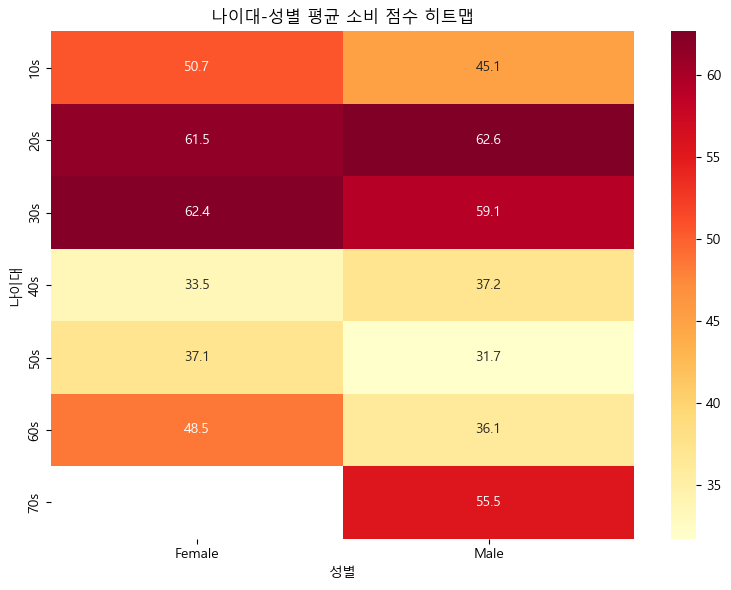

In [152]:
# 히트맵 시각화
plt.figure(figsize=(8, 6))
sns.heatmap(pivot_score, annot=True, fmt=".1f", cmap="YlOrRd")
plt.title("나이대-성별 평균 소비 점수 히트맵")
plt.xlabel("성별")
plt.ylabel("나이대")
plt.tight_layout()
plt.show()


4-50대는 다른 나이대에 비해 소비 점수가 확연히 낮음 <br>
4-50대를 겨냥한 상품 및 마케팅 전략을 준비해 소비력을 상승시킬 필요가 있음

20대 여성은 4-50대와 비교해 확연히 적은 수입에 비해 소비 점수가 상당히 높은 나이대임 <br>
20대 여성 고객군의 특이 소비 성향을 분석해 볼 필요가 있음